<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_neuronal_1_(Regresion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal en una Red Neuronal

### Importaré el módulo que me permitirá generar datos de práctica

In [1]:
#-----------------------------------------#
!git clone https://github.com/Radhe-0/Generadores.git
#-----------------------------------------#

Cloning into 'Generadores'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 134 (delta 75), reused 38 (delta 18), pack-reused 0
Receiving objects: 100% (134/134), 376.50 KiB | 2.05 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [1]:
#-----------------------------------------#
%cd Generadores
#-----------------------------------------#

/content/Generadores


## Importo las librerías requeridas

In [41]:
#-----------------------------------------#
from Generadores import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
#-----------------------------------------#

## Importo los datos y los pongo en un dataframe

In [61]:
#-----------------------------------------#
datos = DatosLineales(160)
df = pd.DataFrame(datos, columns=['X','Y'])
df.head()
#-----------------------------------------#

,X,Y
0,0.375692,10.295627
1,0.783547,15.632911
2,1.970506,25.265055
3,0.897019,14.515804
4,0.391070,12.079976


## Realizo un gráfico de los  datos

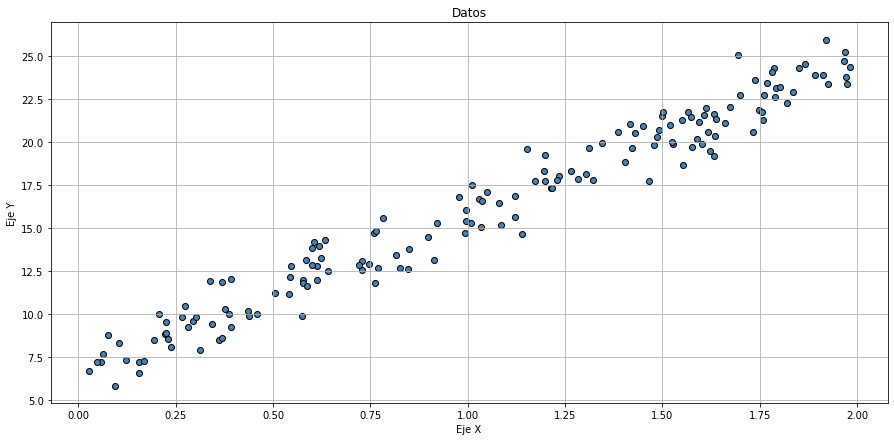

In [62]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(df['X'],df['Y'],color='steelblue', edgecolors='black')
plt.title('Datos')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.grid()
plt.show()
#-----------------------------------------#

## Separo los datos en dos grupos: Los datos de entrenamiento y los datos de evaluación

In [63]:
#-----------------------------------------#
X = df['X'].to_numpy().reshape(-1,1)
Y = df['Y'].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
#-----------------------------------------#

## Grafico los datos de entrenamiento junto con los de evalución

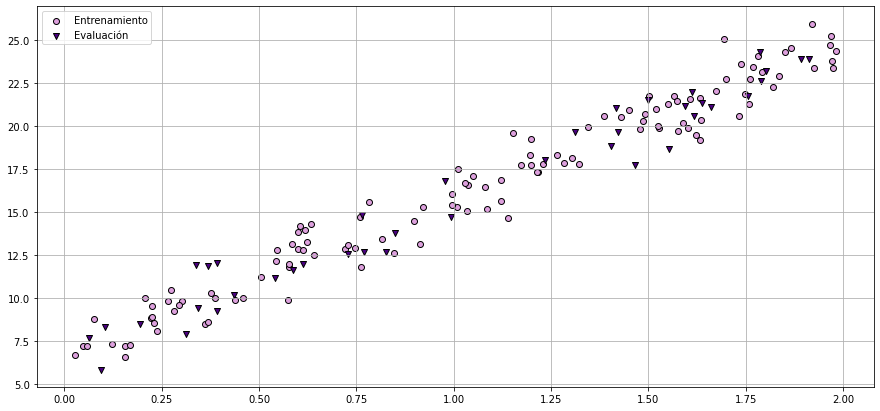

In [64]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(xtrain,ytrain,color='plum', edgecolors='black', label='Entrenamiento')
plt.scatter(xtest,ytest,color='indigo', edgecolors='black', label='Evaluación', marker='v')
plt.legend()
plt.grid()
plt.show()
#-----------------------------------------#

## Creo el modelo de red neuronal

In [65]:
#-----------------------------------------#
modelo = MLPRegressor(hidden_layer_sizes = (), max_iter = 40000)
#-----------------------------------------#

## Entreno la red

In [66]:
#-----------------------------------------#
modelo.fit(xtrain, ytrain)
#-----------------------------------------#

MLPRegressor(hidden_layer_sizes=(), max_iter=40000)

## Realizo las predicciones para graficar la recta de regresión

In [67]:
#-----------------------------------------#
predicciones = modelo.predict(xtest)
#-----------------------------------------#

## Realizo el nuevo gráfico

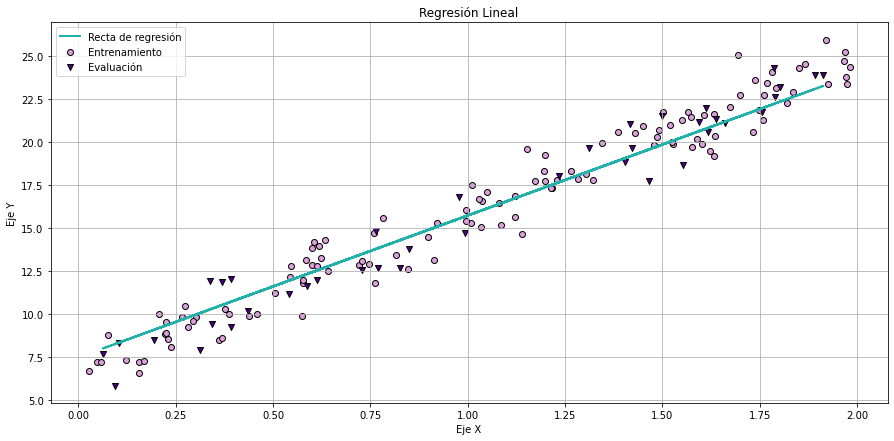

In [68]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(xtrain,ytrain,color='plum', edgecolors='black', label='Entrenamiento')
plt.scatter(xtest,ytest,color='indigo', edgecolors='black', label='Evaluación', marker='v')
plt.plot(xtest,predicciones, color='lightseagreen',lw=2, label='Recta de regresión')
plt.title('Regresión Lineal')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.legend()
plt.grid()
plt.show()
#-----------------------------------------#

## Evalúo la precisión de la red

In [69]:
#-----------------------------------------#
modelo.score(xtest, ytest)
#-----------------------------------------#

0.9546120922539073

### La precisión de la red es del 95.4%

## Realizo algunas predicciones

In [70]:
#-----------------------------------------#
x1 = 2.3
x2 = 2.5
x3 = 3.0

pred1 = modelo.predict([[x1]])
pred2 = modelo.predict([[x2]])
pred3 = modelo.predict([[x3]])

print(f'Cuando x vale {x1} :', pred1)
print(f'Cuando x vale {x2}:', pred2)
print(f'Cuando x vale {x3}:', pred3)
#-----------------------------------------#

Cuando x vale 2.3 : [26.47169137]
Cuando x vale 2.5: [28.12115114]
Cuando x vale 3.0: [32.24480056]


## Realizo un gráfico de las predicciones

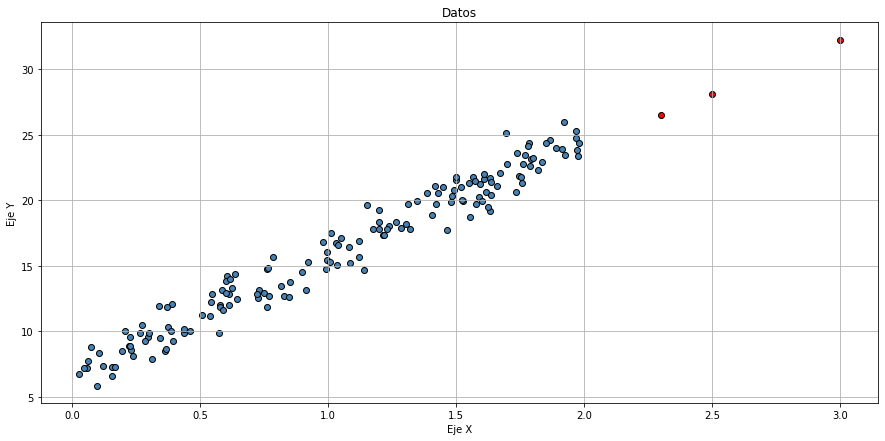

In [71]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(X,Y, color='steelblue',edgecolors='black')
plt.scatter(x1, pred1, color='red',edgecolors='black')
plt.scatter(x2, pred2, color='red',edgecolors='black')
plt.scatter(x3, pred3, color='red',edgecolors='black')
plt.title('Datos')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.grid()
plt.show()
#-----------------------------------------#